PROJETO - SÉRIES TEMPORAIS

Entender a Tendência, Sazonalidade e Ruído

Exploração inicial
Decomposição
Testar se a série é estacionária (adfuller)
Fazer a diferenciação caso não seja estacionária
Graficos e autocorrelation  acf
Arima e Autoarima


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics import tsaplots
from functions import *

In [68]:
df = pd.read_csv("fruitveg_dataset.csv") 
df['Commodity'].value_counts().head()


Commodity
Ginger                  2751
Cauli Local             2750
Cabbage(Local)          2749
Chilli Dry              2748
Raddish White(Local)    2747
Name: count, dtype: int64

In [69]:
df = df[df['Commodity']=="Ginger"]
df

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
63,63,Ginger,6/16/2013,Kg,140,150,145.0
136,136,Ginger,6/17/2013,Kg,140,150,145.0
209,209,Ginger,6/18/2013,Kg,140,150,145.0
282,282,Ginger,6/19/2013,Kg,140,150,145.0
356,356,Ginger,6/20/2013,Kg,140,150,145.0
...,...,...,...,...,...,...,...
196783,196783,Ginger,5/9/2021,Kg,60,80,70.0
196874,196874,Ginger,5/10/2021,Kg,70,80,75.0
196964,196964,Ginger,5/11/2021,Kg,70,80,75.0
197055,197055,Ginger,5/12/2021,Kg,90,100,95.0


In [70]:
df.loc[:,'Date'] = pd.to_datetime(df['Date'],  yearfirst= True)
df.set_index('Date', inplace=True)
df

c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


,SN,Commodity,Unit,Minimum,Maximum,Average
Date,,,,,,
2013-06-16,63,Ginger,Kg,140,150,145.0
2013-06-17,136,Ginger,Kg,140,150,145.0
2013-06-18,209,Ginger,Kg,140,150,145.0
2013-06-19,282,Ginger,Kg,140,150,145.0
2013-06-20,356,Ginger,Kg,140,150,145.0
...,...,...,...,...,...,...
2021-05-09,196783,Ginger,Kg,60,80,70.0
2021-05-10,196874,Ginger,Kg,70,80,75.0
2021-05-11,196964,Ginger,Kg,70,80,75.0


In [97]:
df1 = df.Average.groupby([df.index.month,df.index.year]).mean()
df1 = pd.DataFrame({'price': df1.values[1:]})
primeiro_mes = df.index.min()
ultimo_mes = df.index.max()
todos_meses = pd.date_range(start=primeiro_mes, end=ultimo_mes, freq='MS')
df_referencia = pd.DataFrame({'Data': todos_meses})
df_referencia.set_index('Data', inplace=True)
df1.set_index(df_referencia.index, inplace=True)        

df = df1        
df

,price
Data,
2013-07-01,62.678571
2013-08-01,50.483871
2013-09-01,45.241935
2013-10-01,46.500000
2013-11-01,115.645161
...,...
2021-01-01,53.709677
2021-02-01,50.000000
2021-03-01,107.096774


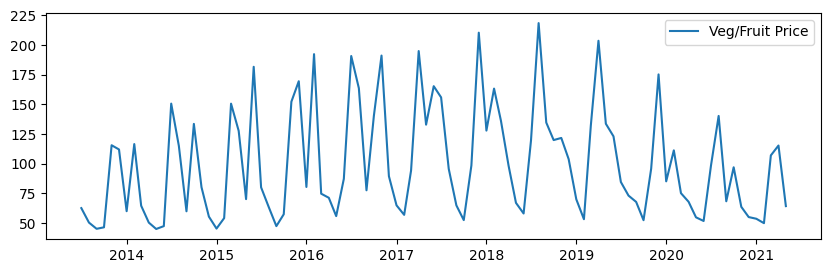

In [98]:
plt.figure(figsize=(10, 10))

# Primeiro subplot
plt.subplot(3, 1, 1)  # (linhas, colunas, índice)
plt.plot(df['price'], label='Veg/Fruit Price')
plt.legend()
plt.show()



Captura por mês

Text(0.5, 0, 'Month')

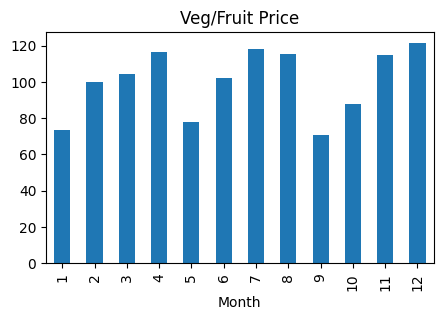

In [99]:
plt.figure(figsize=(5, 3))
df.price.groupby(df.index.month).mean().plot(kind='bar')
plt.title('Veg/Fruit Price')
plt.xlabel('Month')




AUTOCORRELAÇÃO

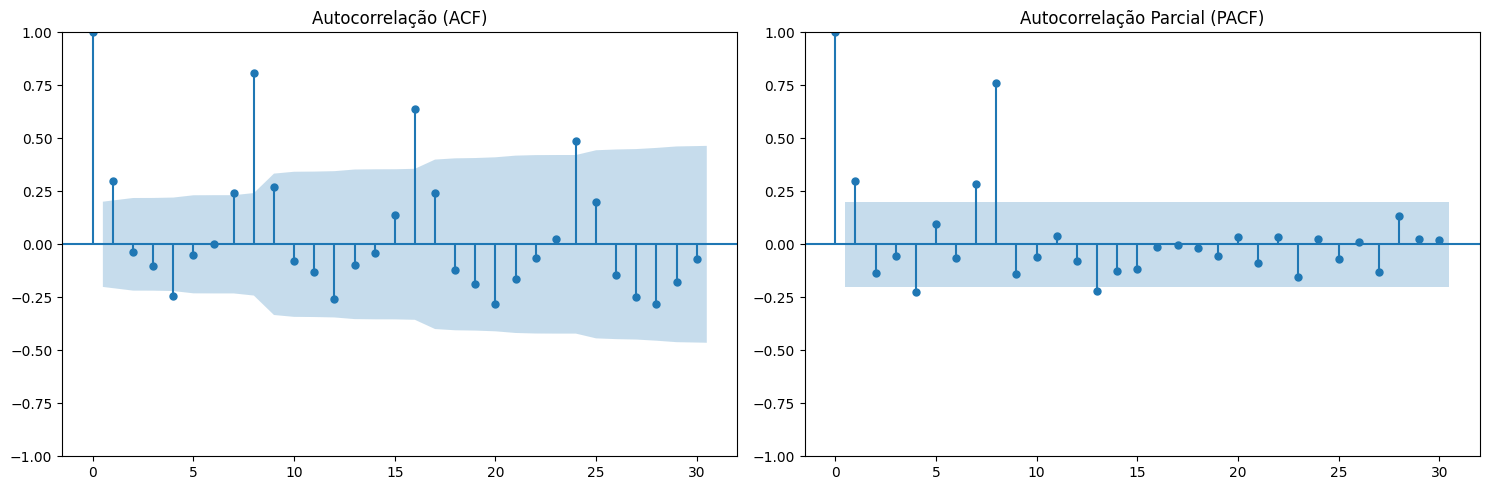

In [101]:
import statsmodels.graphics.tsaplots as tsaplots

# Criar uma figura com dois subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plotar o gráfico de autocorrelação (ACF) no primeiro subplot
tsaplots.plot_acf(df['price'], lags=30, ax=ax1)
ax1.set_title('Autocorrelação (ACF)')

# Plotar o gráfico de autocorrelação parcial (PACF) no segundo subplot
tsaplots.plot_pacf(df['price'], lags=30, ax=ax2)
ax2.set_title('Autocorrelação Parcial (PACF)')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar os gráficos
plt.show()

TESTANDO SE É ESTACIONARIO

Augmented Dickey-Fuller Test (ADF)

In [102]:
adf(df.price)
KPSS(df.price)


O dado não é estacionário
KPSS Statistic: 0.281390
p-value: 0.100000
Estacionária


c:\Users\maria\Desktop\MeuGit\SeriesTemporais\functions.py:18: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(x, regression='c')


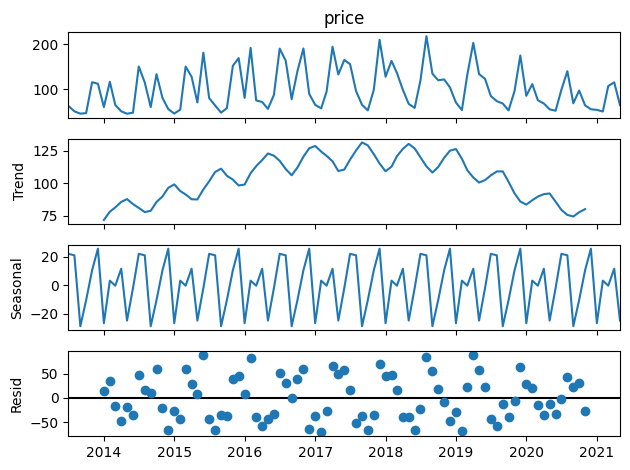

In [104]:
result = seasonal_decompose(df.price, period=12)
result.plot()
plt.show()

DIFERENCIAÇÃO

<Axes: xlabel='Data'>

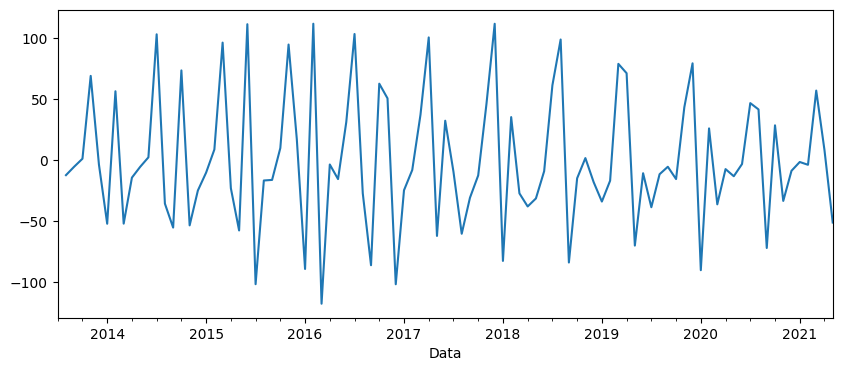

In [253]:
df['vegDiff'] = df.price.diff()
plt.figure(figsize=(10, 4))
df['vegDiff'].plot()

In [254]:
adf(df['vegDiff'][1:])
KPSS(df['vegDiff'][1:])

O dado não é estacionário
KPSS Statistic: 0.240037
p-value: 0.100000
Estacionária


c:\Users\maria\Desktop\MeuGit\SeriesTemporais\functions.py:18: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(x, regression='c')


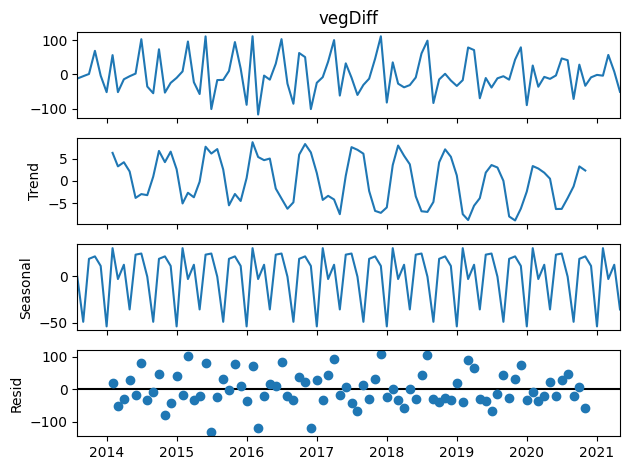

In [255]:
result = seasonal_decompose(df['vegDiff'][1:], period=12)
result.plot()
plt.show()

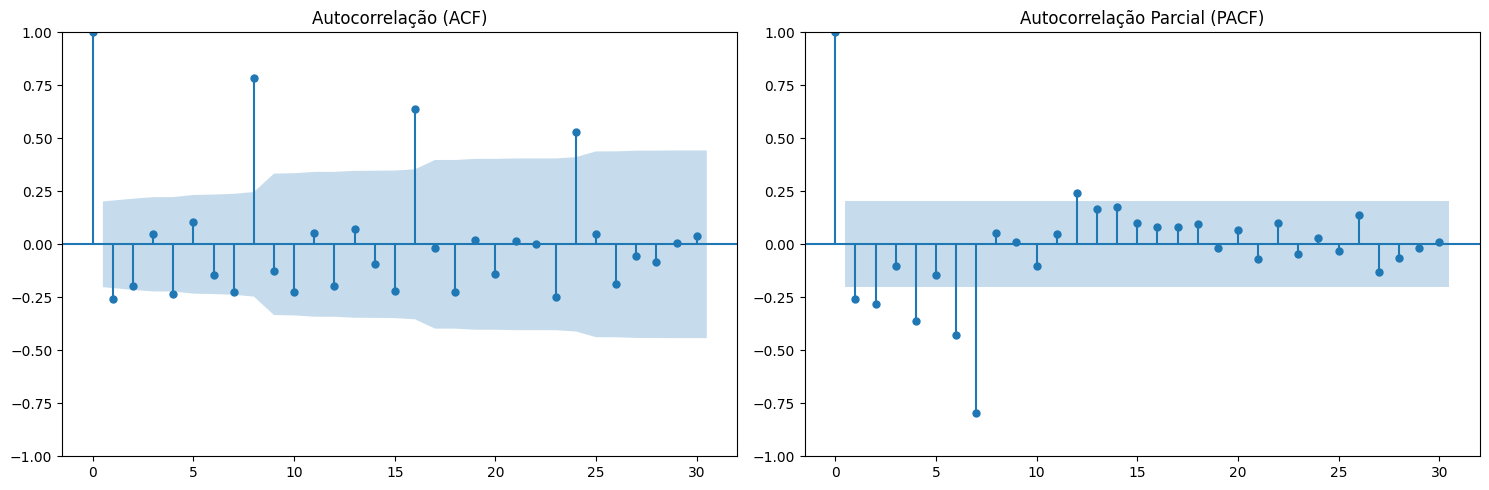

In [256]:
# Criar uma figura com dois subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plotar o gráfico de autocorrelação (ACF) no primeiro subplot
tsaplots.plot_acf(df['vegDiff'][1:], lags=30, ax=ax1)
ax1.set_title('Autocorrelação (ACF)')

# Plotar o gráfico de autocorrelação parcial (PACF) no segundo subplot
tsaplots.plot_pacf(df['vegDiff'][1:], lags=30, ax=ax2)
ax2.set_title('Autocorrelação Parcial (PACF)')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar os gráficos
plt.show()

DADO TRAIN E TEST

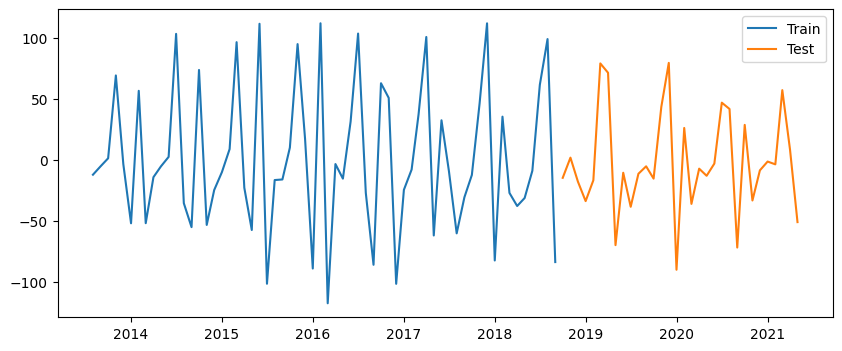

In [257]:
train_size = int(len(df.vegDiff)*2/3)
train_set = df.vegDiff[:train_size]
test_set = df.vegDiff[train_size:]
plt.figure(figsize=(10, 4))
plt.plot(train_set, label="Train")
plt.plot(test_set, label="Test")
plt.legend()

MODELO AUTOREGRESSIVO (AR) - LinearRegression

In [258]:
from sklearn.linear_model import LinearRegression

dfmodel = pd.DataFrame({'TrainVeg': train_set, 'naiveTrain': train_set.shift(1)}).dropna()
X = dfmodel[['naiveTrain']]
y = dfmodel[['TrainVeg']]

reg = LinearRegression().fit(X,y)
prediction = reg.predict(X)


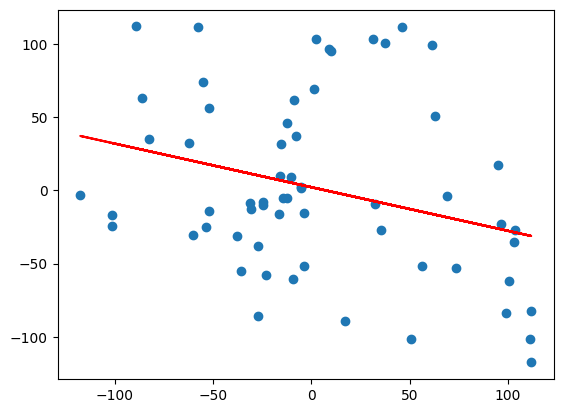

In [259]:
plt.scatter(X, y)
plt.plot(X, prediction, color='red')

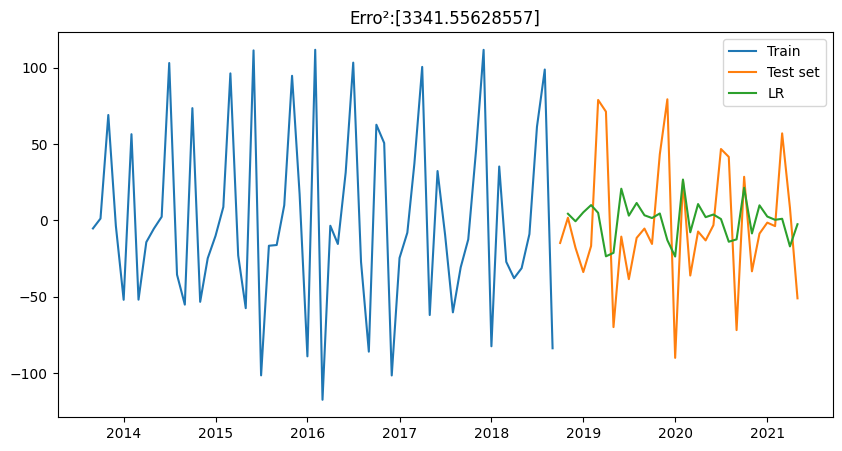

In [260]:
coef = reg.coef_[0][0]
pred_AR1 =  coef * test_set.shift(1)

erro = ((y-prediction)**2).mean()

plt.figure(figsize=(10, 5))
plt.plot(dfmodel['TrainVeg'], label="Train")
plt.plot(test_set, label='Test set')
plt.plot(pred_AR1, label="LR")
plt.title(f"Erro²:{erro.values}")
plt.legend()

plt.show()

AUTOREGRESSIVE A PARTIR DO statsmodel

In [261]:
train_size = int(len(df.price)*2/3)
train_set = df.price[:train_size]
test_set = df.price[train_size:]
dfmodel =  pd.DataFrame({'TrainVeg': train_set, 'TrainDiff':train_set.diff(1)}).dropna()
test_diff = test_set.diff(1)

In [262]:
from statsmodels.tsa.ar_model import AutoReg 


dfmodel.index = pd.date_range(start=dfmodel['TrainDiff'].index[0], periods=len(dfmodel['TrainDiff']), freq='MS')
ar1 = AutoReg(dfmodel['TrainDiff'], lags=1).fit()
dfmodel.index = pd.date_range(start=dfmodel['TrainDiff'].index[0], periods=len(dfmodel['TrainDiff']), freq='MS')
ar2 = AutoReg(dfmodel['TrainDiff'], lags=2).fit()
prediction1 = ar1.predict()
prediction2 = ar2.predict()
ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              TrainDiff   No. Observations:                   62
Model:                     AutoReg(2)   Log Likelihood                -326.135
Method:               Conditional MLE   S.D. of innovations             55.514
Date:                Wed, 27 Mar 2024   AIC                            660.269
Time:                        02:29:43   BIC                            668.646
Sample:                    10-01-2013   HQIC                           663.546
                         - 09-01-2018                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.8523      7.178      0.397      0.691     -11.216      16.921
TrainDiff.L1    -0.3796      0.124     -3.062      0.002      -0.623      -0.137
TrainDiff.L2    -0.3130      0.127     -2.470      0.014      -0.561      -0.065
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.6064           -1.6813j            1.7873           -0.3051
AR.2           -0.6064           +1.6813j            1.7873            0.3051
-----------------------------------------------------------------------------
"""

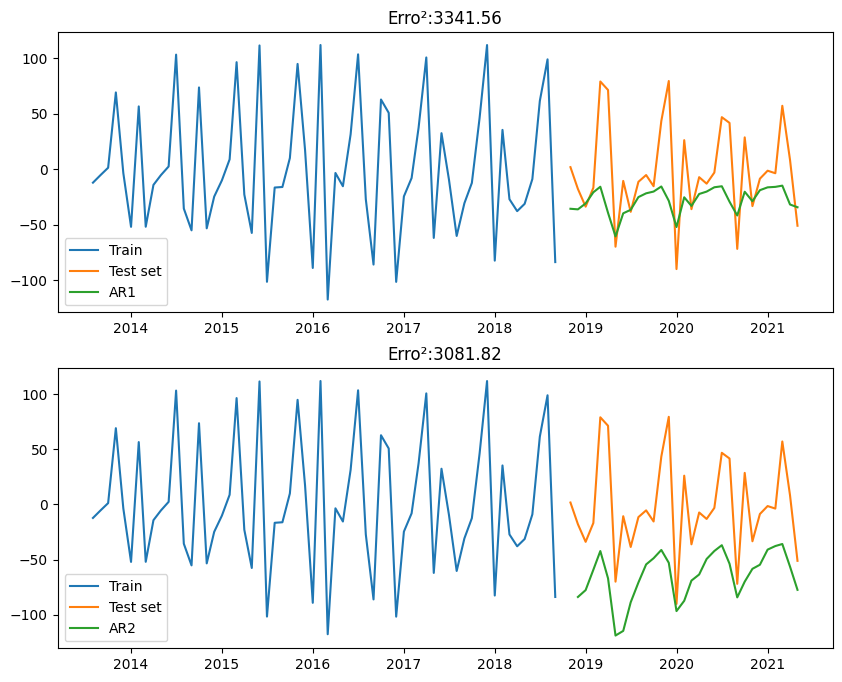

In [263]:
pred_AR1 = 0
for i, coef in enumerate(ar1.params[1:]):
    pred_AR1 +=  coef * test_set.shift(i+1)
    
pred_AR2 = 0
for i, coef in enumerate(ar2.params[1:]):
    pred_AR2 +=  coef * test_set.shift(i+1)
    
erro1 = round(((dfmodel.TrainDiff-prediction1)**2).mean(),2)
erro2 = round(((dfmodel.TrainDiff-prediction2)**2).mean(),2)

plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)  # (linhas, colunas, índice)
plt.plot(dfmodel.TrainDiff, label="Train")
plt.plot(test_diff, label='Test set')
plt.plot(pred_AR1, label="AR1")
plt.title(f"Erro²:{erro1}")
plt.legend()

plt.subplot(2, 1, 2)  # (linhas, colunas, índice)
plt.plot(dfmodel.TrainDiff, label="Train")
plt.plot(test_diff, label='Test set')
plt.plot(pred_AR2, label="AR2")
plt.title(f"Erro²:{erro2}")
plt.legend()


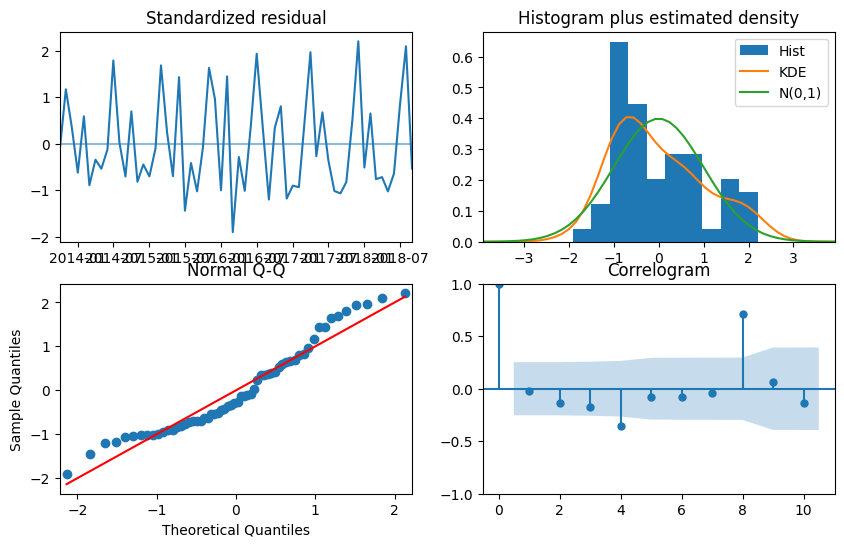

In [264]:
ar2.plot_diagnostics(figsize=(10,6));


#ARIMA
AR(p) = Efeito do momentum na série
I = integrated: uso das diferenças das informações
MA(p) = Efeito do ruído na série
p = periodos

In [265]:
from statsmodels.tsa.arima.model import ARIMA


arima_train = ARIMA(train_set,  order = (2,1,12)).fit()
arima = ARIMA(test_set, freq='MS', order = (2,1,12)).fit(arima_train.params)
pred_arima = arima.predict()
#arma.summary()


c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\maria\AppData\Local

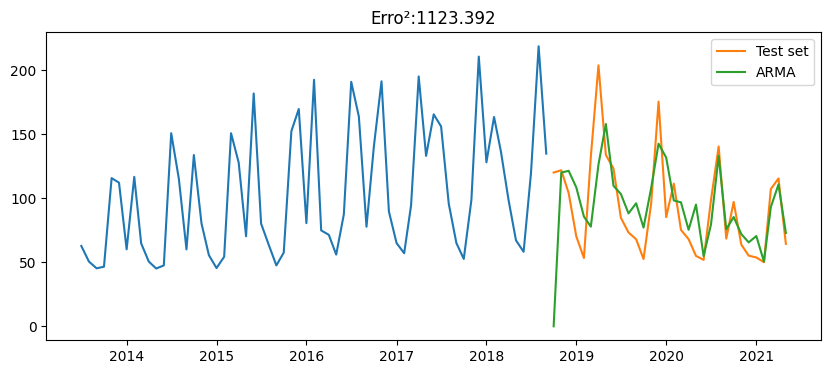

In [266]:
erro = round(((test_set - pred_arima)**2).mean(),3)
plt.figure(figsize=(10, 4))
plt.plot(train_set)
plt.plot(test_set, label='Test set')
plt.plot(pred_arima, label="ARMA")
plt.title(f"Erro²:{erro}")
plt.legend()

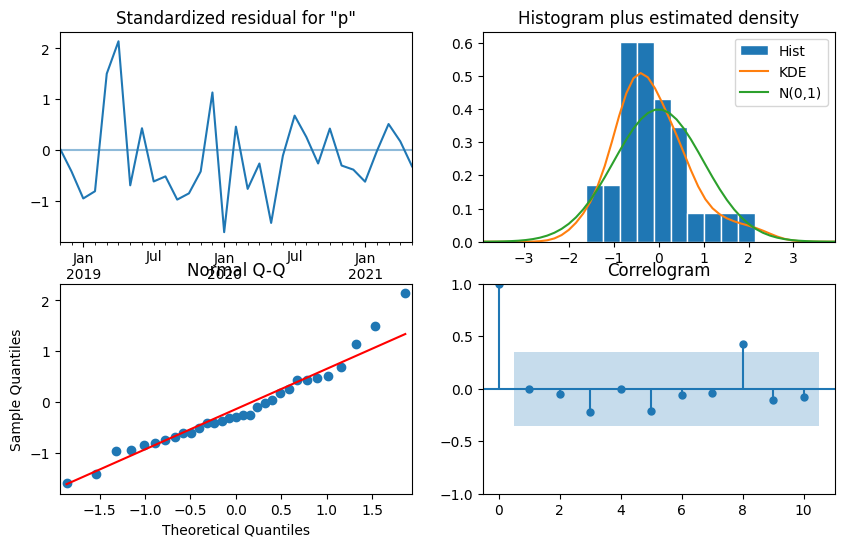

In [267]:
arima.plot_diagnostics(figsize=(10,6));


SARIMA

In [280]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_train = SARIMAX(train_set, order = (2, 1, 1), seasonal_order = (2,1,1,12)).fit()
sarima = SARIMAX(test_set, order = (2, 1, 1), seasonal_order = (2,1,1,12)).fit(sarima_train.params)

c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA pa

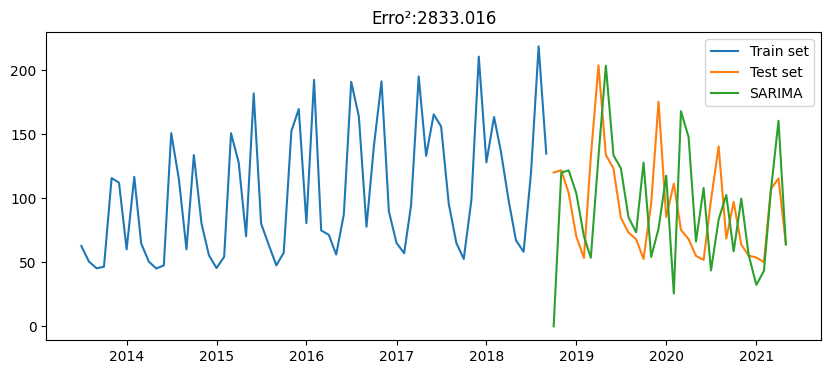

In [281]:
erro = round((sarima.resid**2).mean(),3)
plt.figure(figsize=(10, 4))
plt.plot(train_set, label='Train set')
plt.plot(test_set, label='Test set')
plt.plot(sarima.predict(typ='levels'), label="SARIMA")
plt.title(f"Erro²:{erro}")
plt.legend()


AUTOARIMA

In [277]:
from pmdarima import auto_arima
import pandas as pd

# Suponha que você tenha um DataFrame df com a série temporal que deseja modelar
# e a série esteja na coluna 'serie_temporal'

# Ajustar o modelo AutoARIMA
modelo_autoarima = auto_arima(train_set, seasonal=True, m=12)

# Resumo do modelo
print(modelo_autoarima.summary())

c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(5,1,2)(2,0,2)[6]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
                           ^^^^^^^^^^^^^^
  File "c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit

                                       SARIMAX Results                                        
Dep. Variable:                                      y   No. Observations:                   63
Model:             SARIMAX(5, 1, 3)x(1, 0, [1, 2], 6)   Log Likelihood                -299.719
Date:                                Wed, 27 Mar 2024   AIC                            623.437
Time:                                        02:34:33   BIC                            648.963
Sample:                                    07-01-2013   HQIC                           633.459
                                         - 09-01-2018                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6421      0.183     -3.517      0.000      -1.000      -0.284
ar.

In [271]:
modelo_autoarima.fit(train_set)

ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(2, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA pa

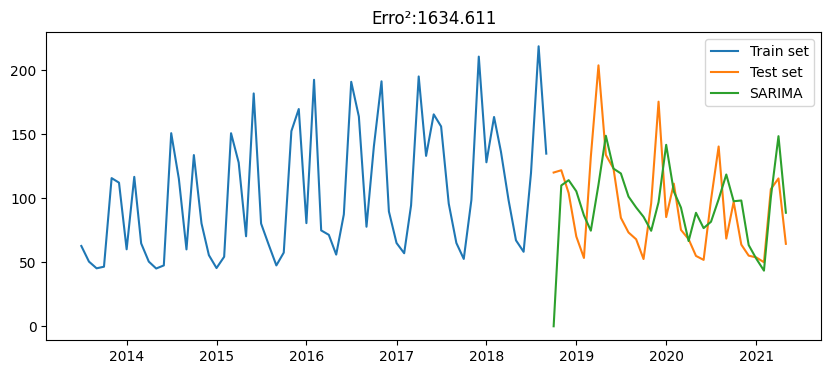

In [278]:
sarima_train = SARIMAX(train_set, order = (2, 0, 1), seasonal_order = (2,0,0,12)).fit()
sarima_auto = SARIMAX(test_set, order = (2,0, 1), seasonal_order = (2,0,0,12)).fit(sarima_train.params)
erro = round((sarima_auto.resid**2).mean(),3)
plt.figure(figsize=(10, 4))
plt.plot(train_set, label='Train set')
plt.plot(test_set, label='Test set')
plt.plot(sarima_auto.predict(typ='levels'), label="SARIMA")
plt.title(f"Erro²:{erro}")
plt.legend()


PREVISÕES FUTURAS - FORECAST

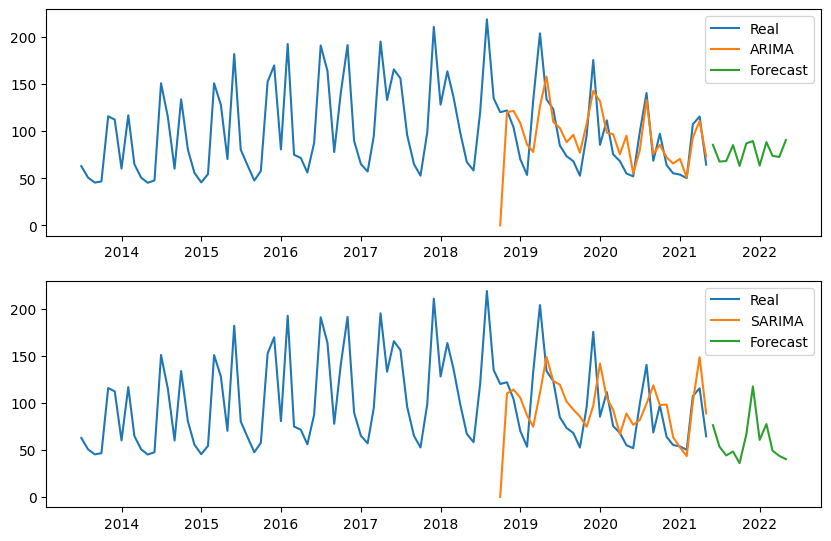

In [279]:
# Fazer previsões para os próximos 'n' períodos
n = 12  # Defina o número de períodos futuros para prever
forecastArima = arima.forecast(steps=n)
forecastSarima = sarima_auto.forecast(steps=n)

plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1)  # (linhas, colunas, índice)
plt.plot(df.price, label='Real')
plt.plot(arima.predict(typ='levels'), label="ARIMA")
plt.plot(forecastArima, label="Forecast")
plt.legend()                

plt.subplot(3, 1, 2)  # (linhas, colunas, índice)
plt.plot(df.price, label='Real')
plt.plot(sarima_auto.predict(typ='levels'), label="SARIMA")
plt.plot(forecastSarima, label="Forecast")
plt.legend()   

#plt.subplot(3, 1, 3)  # (linhas, colunas, índice)

plt.legend()                  